In [2]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
import pandas as pd
import os
import glob
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensuring a backend is set for matplotlib

import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # If only plt is imported, switch backend appropriately

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Ensuring inline plotting if on a Kaggle platform
%matplotlib inline

# Setting aesthetic style for seaborn plots
sns.set(style='whitegrid')

# Option 1: If you know the exact file path
file_path = "water_consumption_forecasting.csv"

# Load the data directly if you know the file path
df = pd.read_csv(file_path)
print("\nData preview:")
print(df.head())
print(f"\nData shape: {df.shape}")


Data preview:
  region        date  consumption_liters
0  North  2023-01-01            11673.07
1  North  2023-01-02            14736.03
2  North  2023-01-03            19370.75
3  North  2023-01-04            17774.55
4  North  2023-01-05            14972.58

Data shape: (900, 3)


In [4]:
print("Missing values before cleaning:")
print(df.isnull().sum())
print(f"Original shape: {df.shape}")

# Remove rows with any missing values
df_cleaned = df.dropna()

# Alternative: If you only want to remove rows where specific columns have missing values
# df_cleaned = df.dropna(subset=['column1', 'column2'])  # Replace with your important columns

print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())
print(f"Cleaned shape: {df_cleaned.shape}")

# Check how many rows were removed
rows_removed = df.shape[0] - df_cleaned.shape[0]
print(f"\nRows removed: {rows_removed} ({rows_removed/df.shape[0]:.2%} of data)")

# If too many rows would be removed, consider imputation instead
if rows_removed/df.shape[0] > 0.2:  # If more than 20% would be removed
    print("\nWarning: Removing missing values results in significant data loss.")
    print("Consider using imputation methods instead for anomaly detection.")

# Use the cleaned dataframe for further analysis
df = df_cleaned.copy()

# Display the cleaned data
print("\nCleaned data preview:")
print(df.head())

Missing values before cleaning:
region                0
date                  0
consumption_liters    0
dtype: int64
Original shape: (900, 3)

Missing values after cleaning:
region                0
date                  0
consumption_liters    0
dtype: int64
Cleaned shape: (900, 3)

Rows removed: 0 (0.00% of data)

Cleaned data preview:
  region        date  consumption_liters
0  North  2023-01-01            11673.07
1  North  2023-01-02            14736.03
2  North  2023-01-03            19370.75
3  North  2023-01-04            17774.55
4  North  2023-01-05            14972.58


In [5]:
try:
    df['date'] = pd.to_datetime(df['date'])
except Exception as e:
    print("Error converting date column: {}".format(e))
print (df.dtypes)

region                        object
date                  datetime64[ns]
consumption_liters           float64
dtype: object


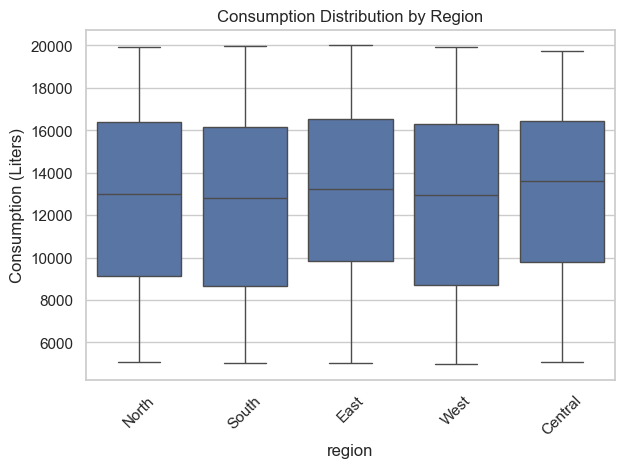

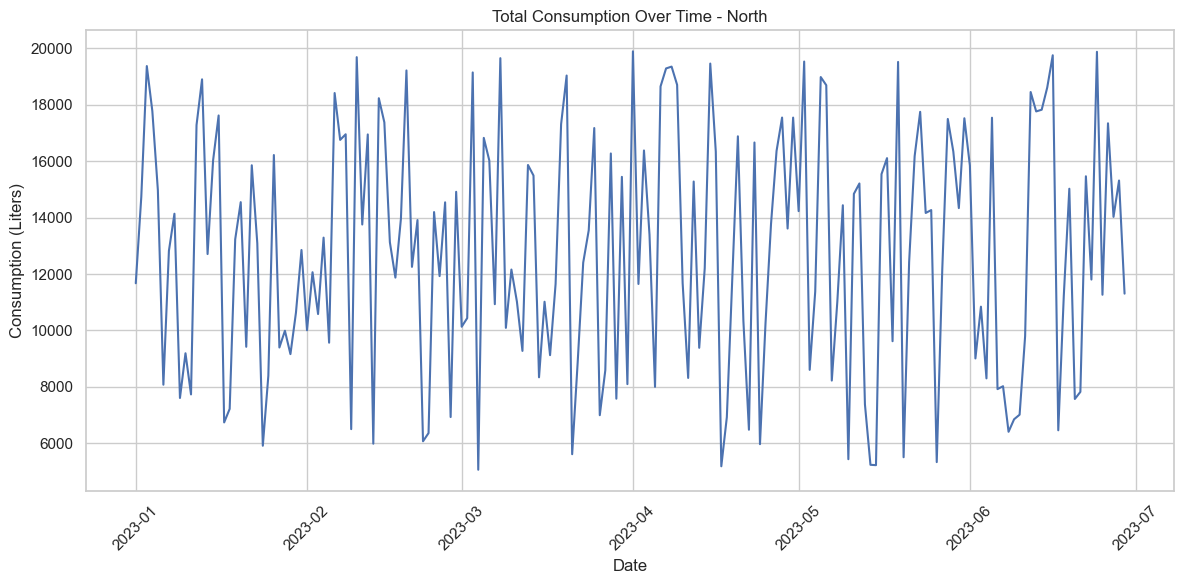

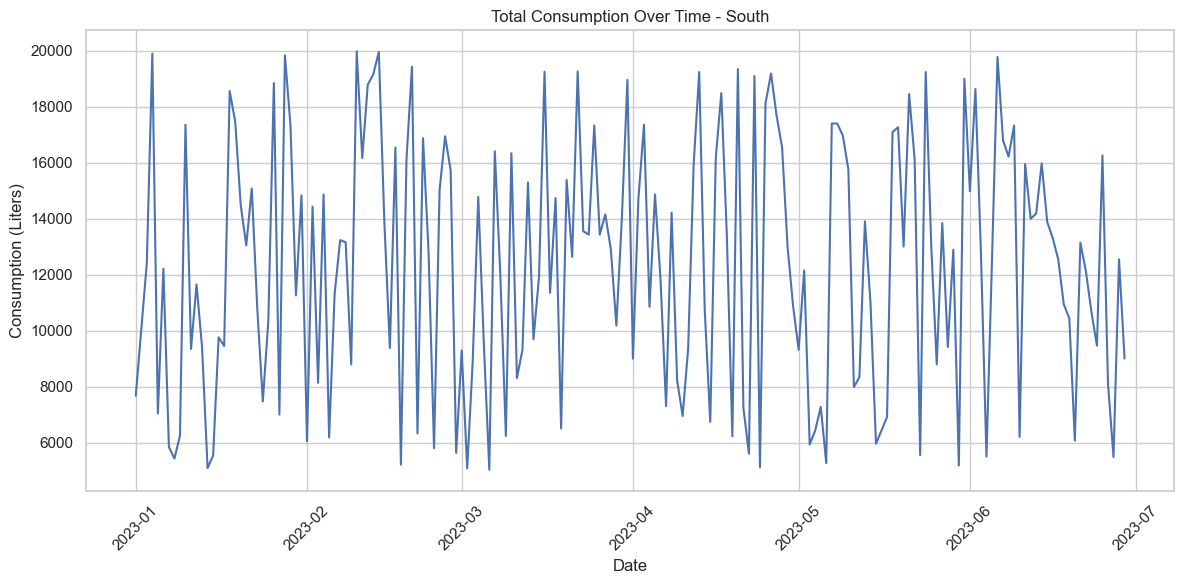

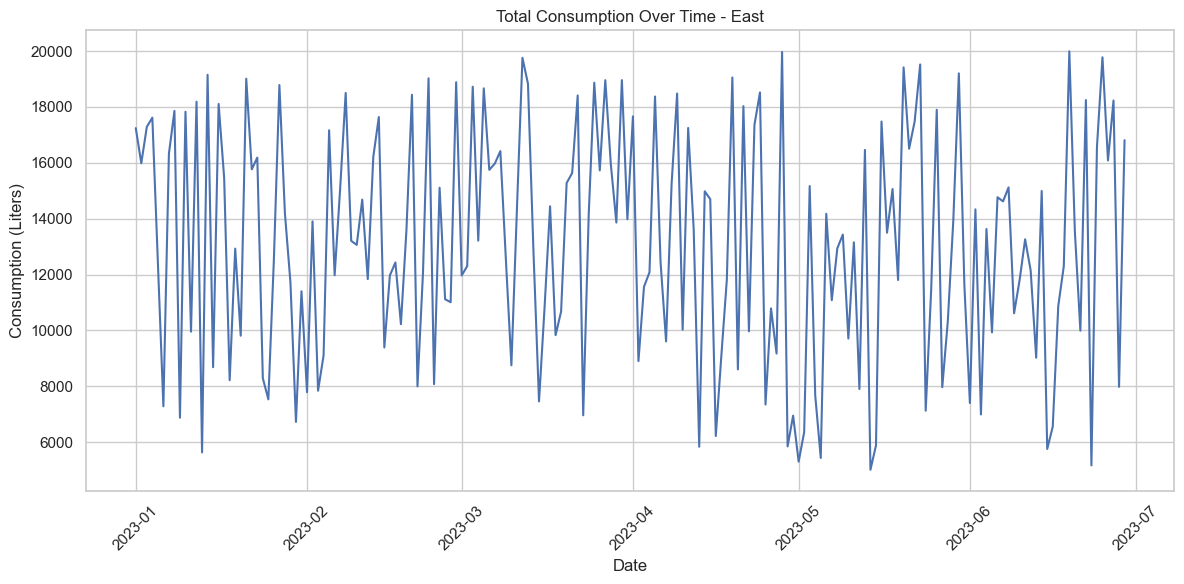

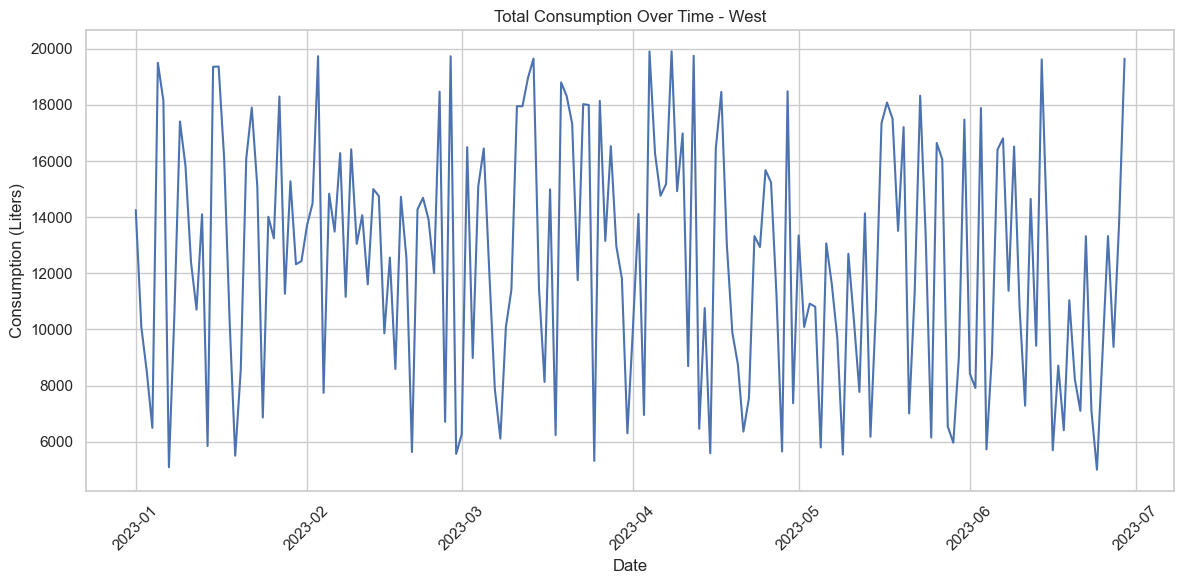

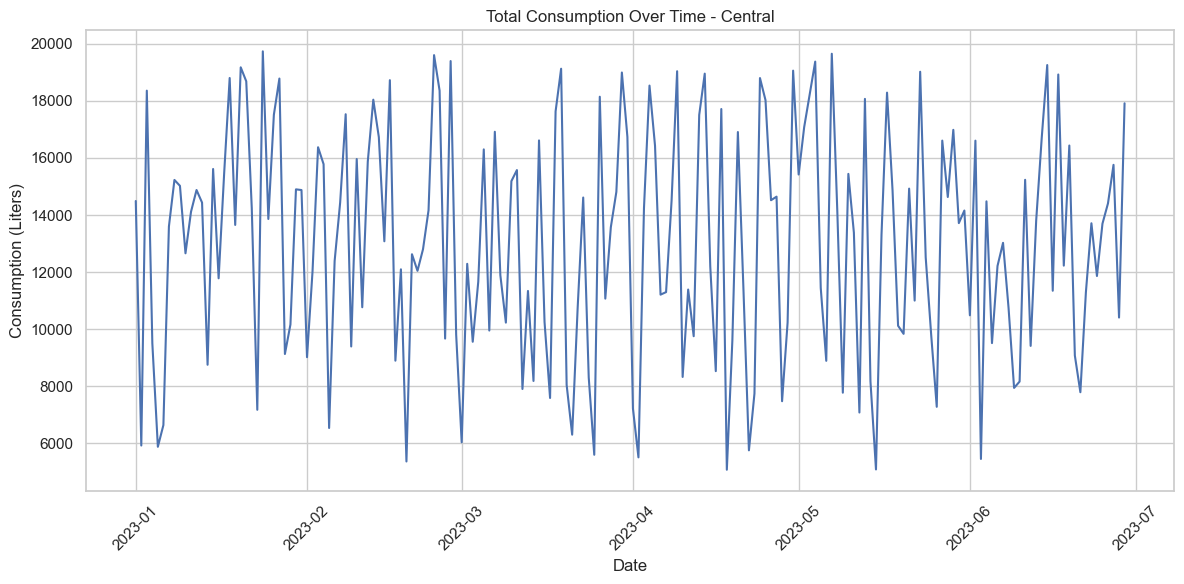

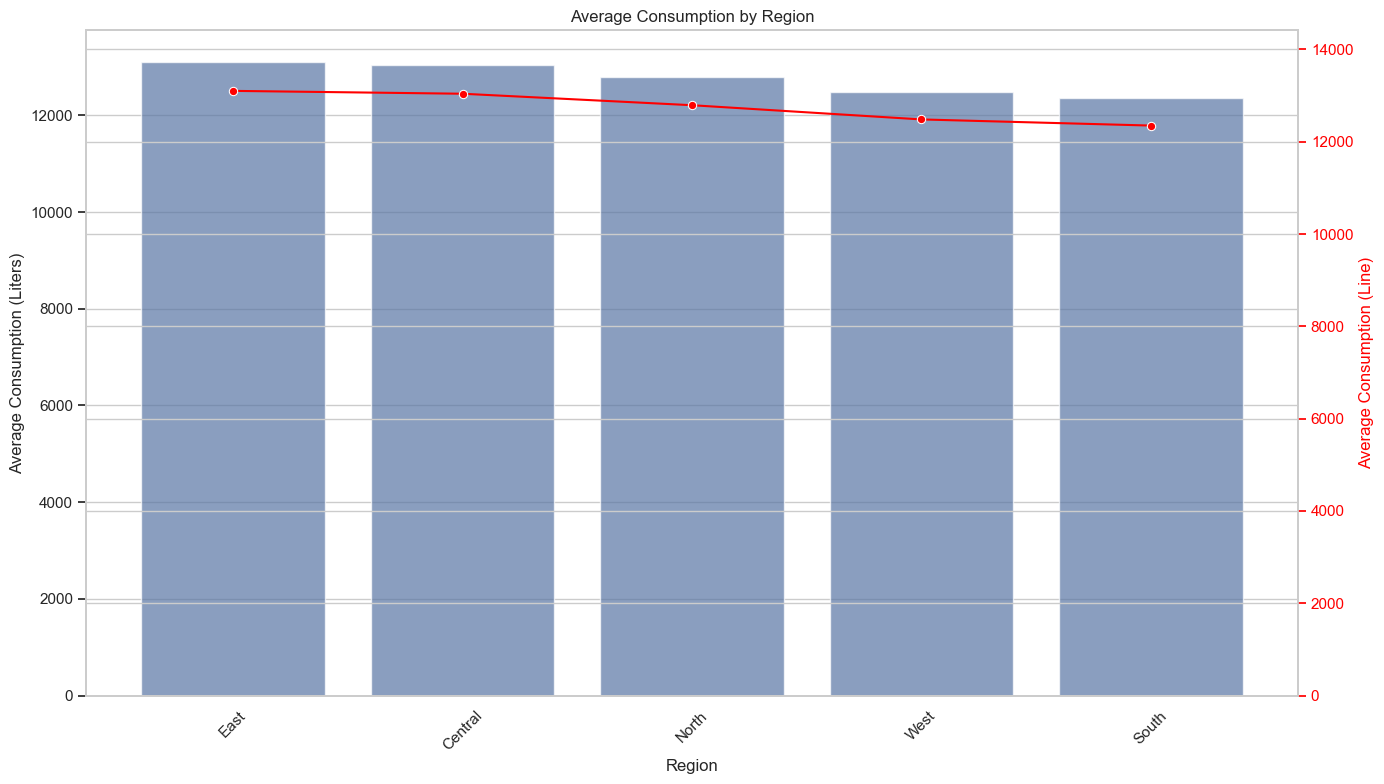

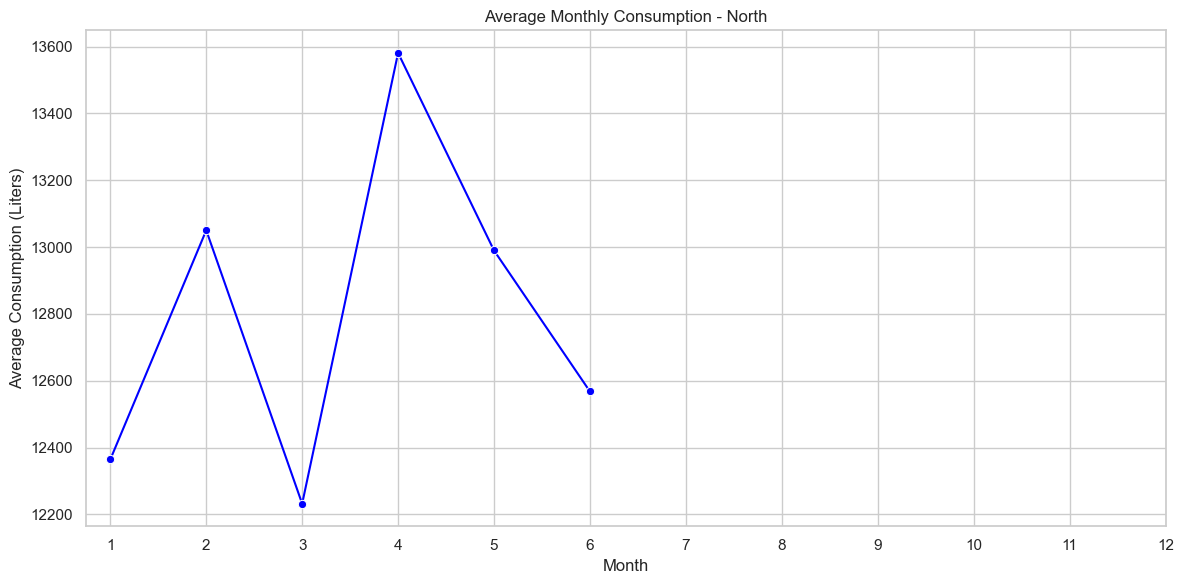

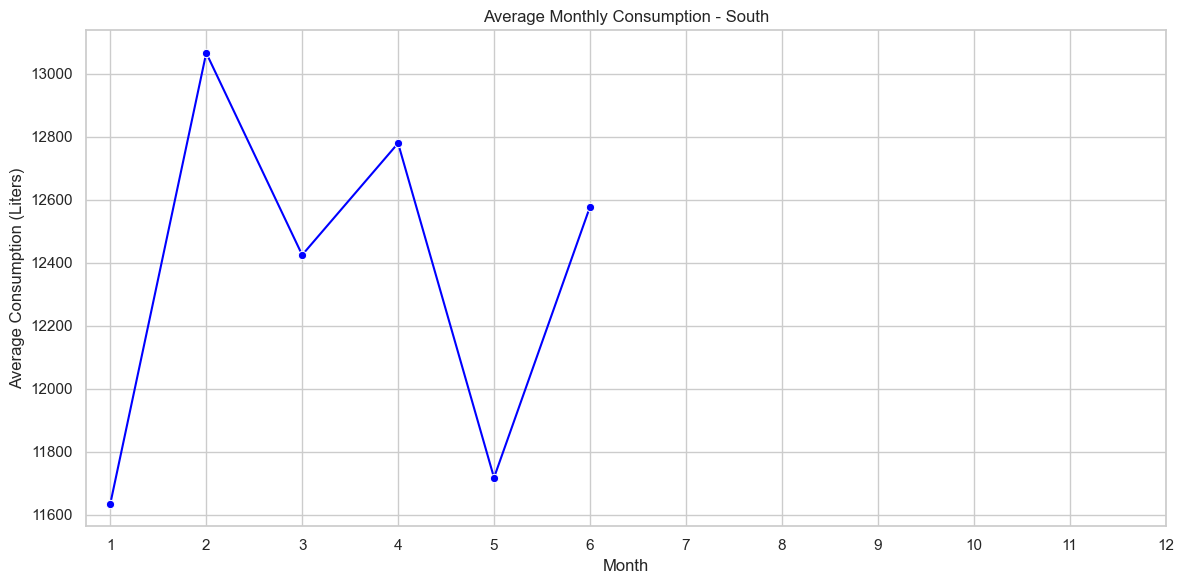

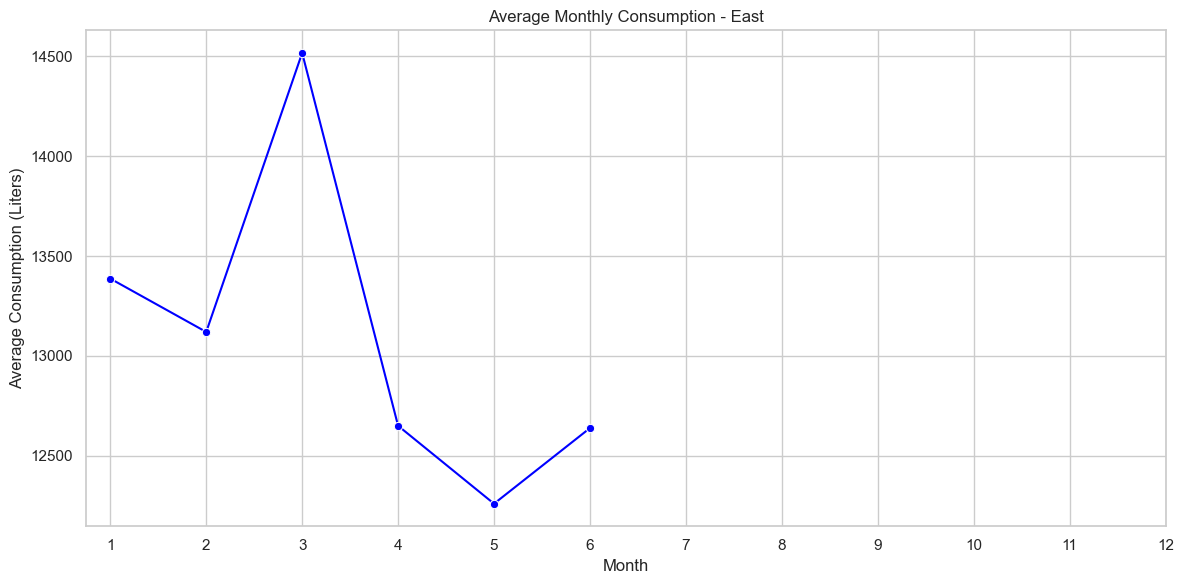

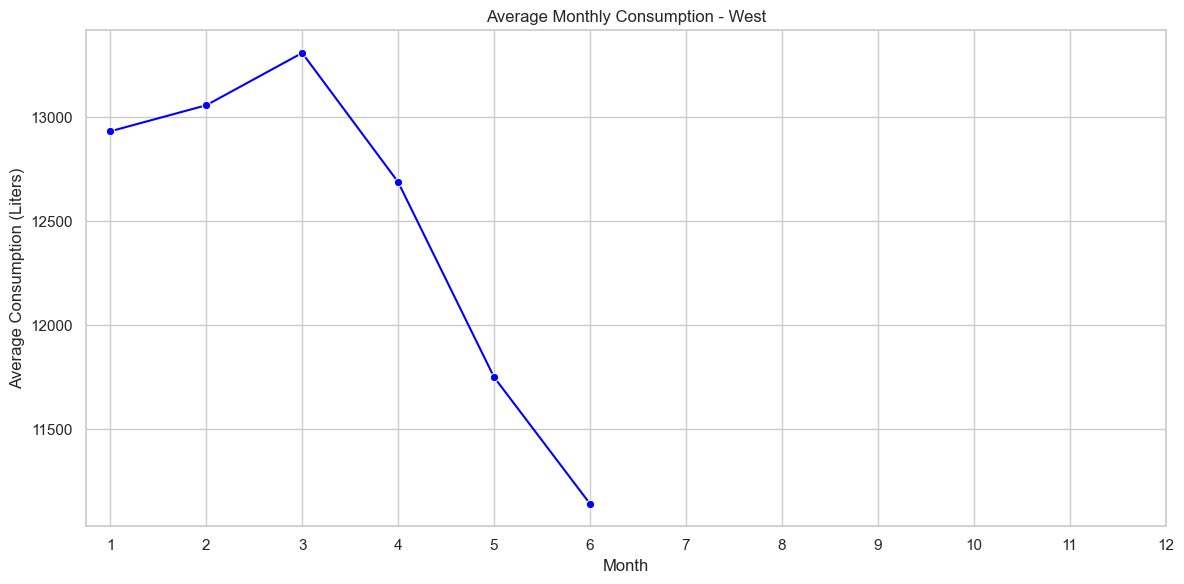

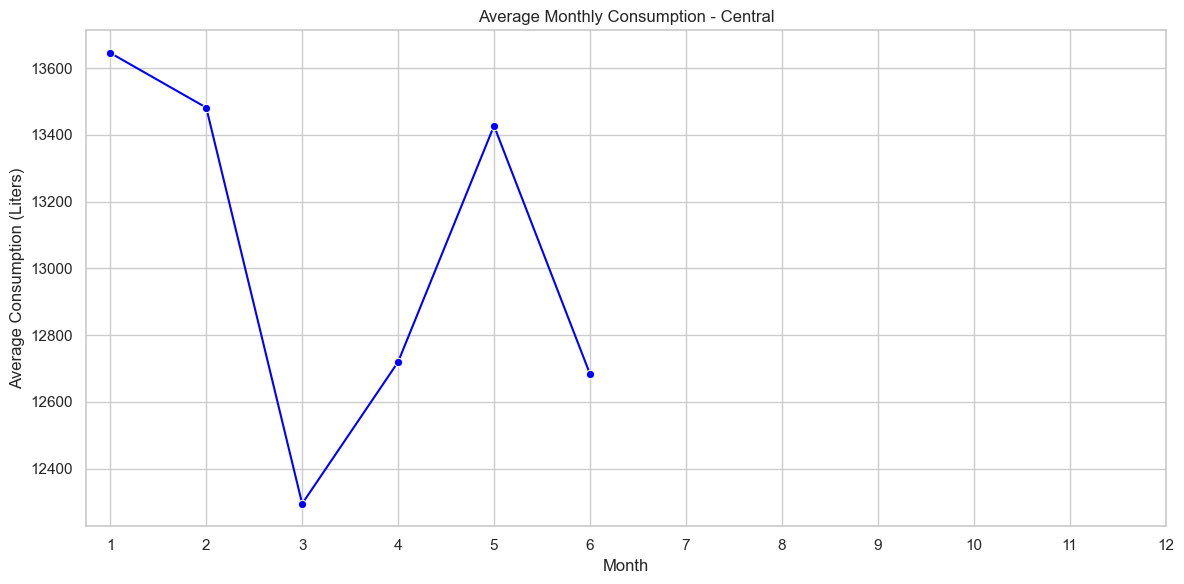

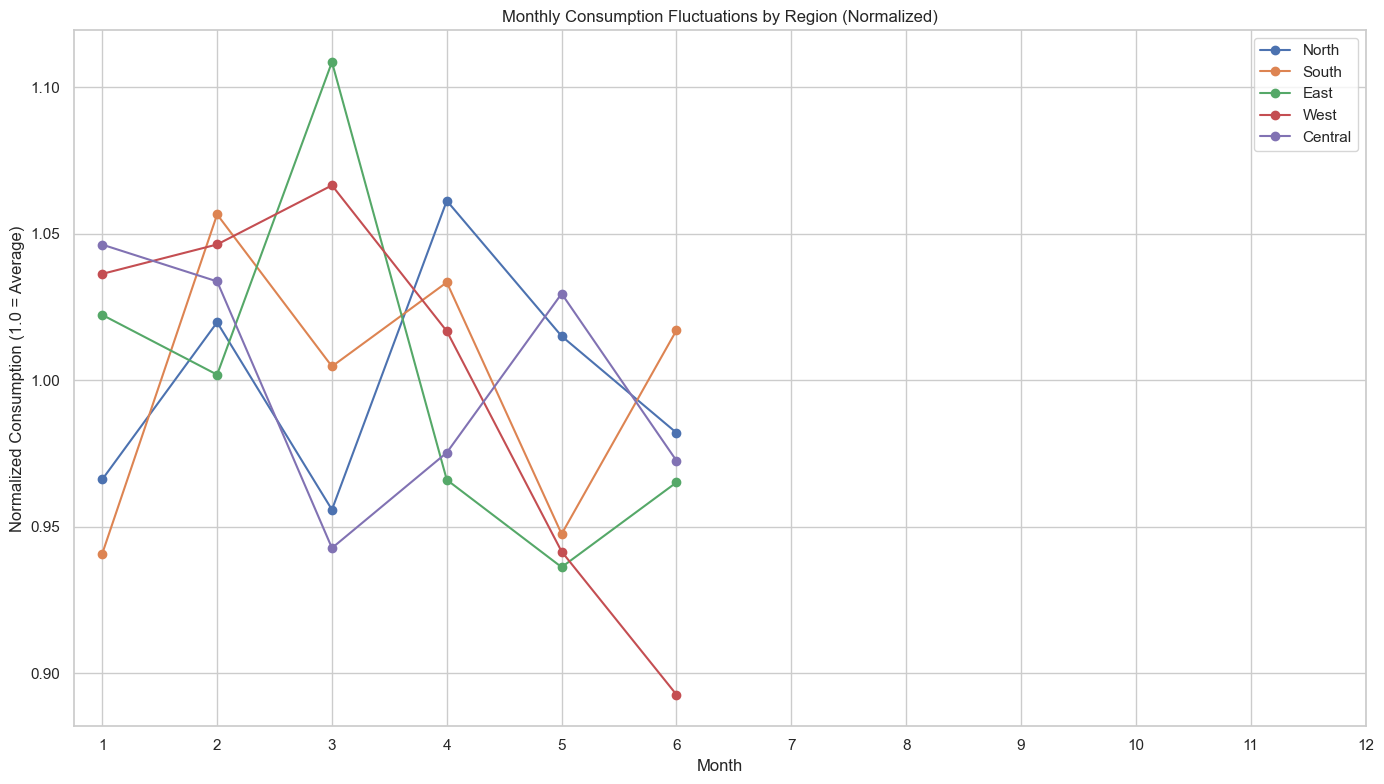

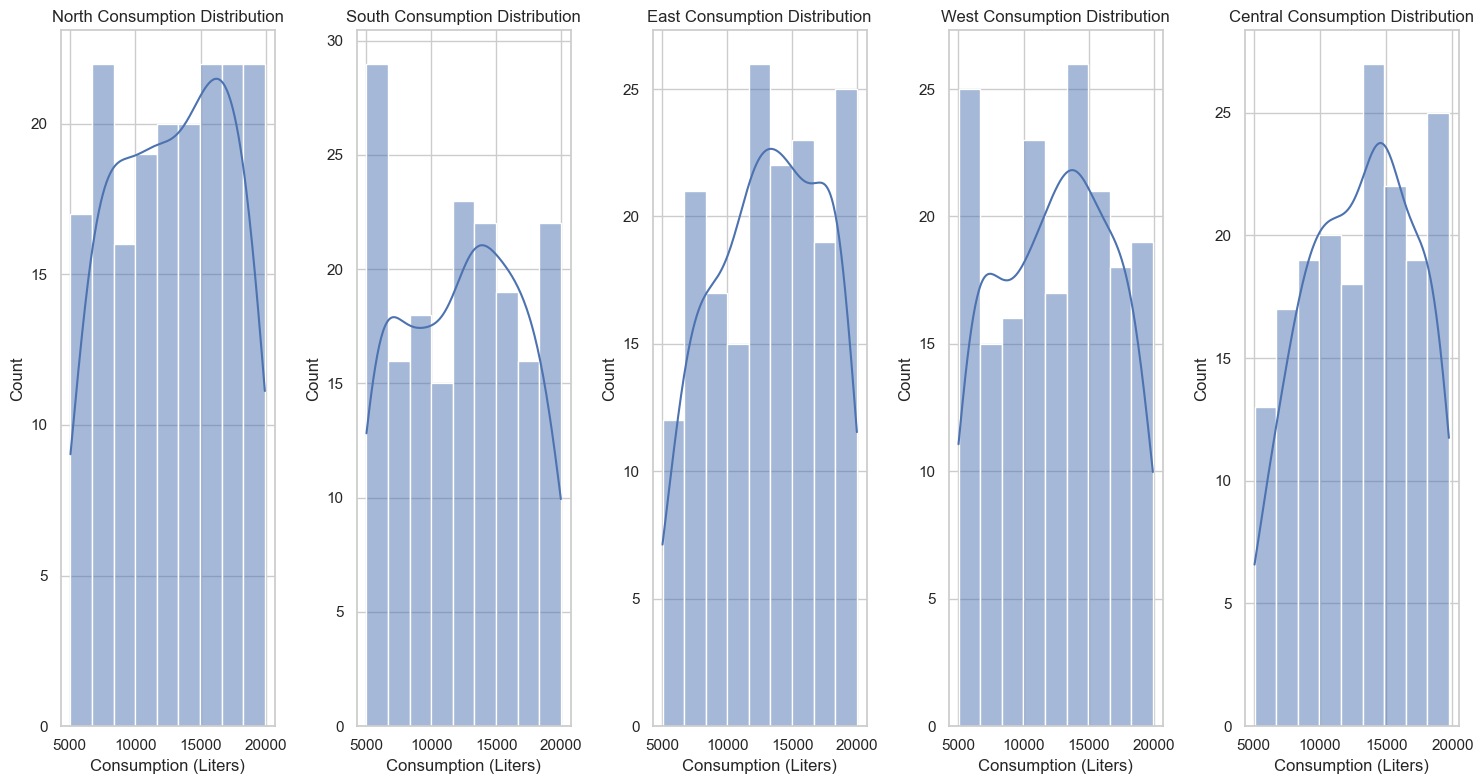

In [6]:


# Add necessary imports at the beginning
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Your plotting code starts here
plt.figure(figsize=(15, 10))

# 1. First subplot (assuming this is where your code starts)
plt.subplot(2, 2, 1)
sns.boxplot(x='region', y='consumption_liters', data=df)
plt.title('Consumption Distribution by Region')
plt.ylabel('Consumption (Liters)')
plt.xticks(rotation=45)

# 4. Consumption over time - Separate graphs for each region
# Convert date to datetime if not already
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])

# Create separate time series plots for each region
regions = df['region'].unique()
for region in regions:
    plt.figure(figsize=(12, 6))
    region_data = df[df['region'] == region]
    region_ts = region_data.groupby('date')['consumption_liters'].sum().reset_index()
    plt.plot(region_ts['date'], region_ts['consumption_liters'], label=f'{region} Consumption')
    plt.title(f'Total Consumption Over Time - {region}')
    plt.xlabel('Date')
    plt.ylabel('Consumption (Liters)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Compare average consumption per region with bar and line chart
plt.figure(figsize=(14, 8))
# Calculate average consumption per region
region_avg = df.groupby('region')['consumption_liters'].mean().reset_index()
region_avg = region_avg.sort_values('consumption_liters', ascending=False)

# Create bar chart
ax = sns.barplot(x='region', y='consumption_liters', data=region_avg, alpha=0.7)
plt.title('Average Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Average Consumption (Liters)')
plt.xticks(rotation=45)

# Add line graph on top
ax2 = ax.twinx()
sns.lineplot(x=range(len(region_avg)), y=region_avg['consumption_liters'], 
             marker='o', color='red', ax=ax2)
ax2.set_ylabel('Average Consumption (Line)', color='red')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim(0, region_avg['consumption_liters'].max() * 1.1)  # Set y-axis limit with some padding

plt.tight_layout()
plt.show()

# 6. Monthly consumption patterns - Separate charts for each region
df['month'] = df['date'].dt.month
monthly_consumption = df.groupby(['region', 'month'])['consumption_liters'].mean().reset_index()

# Create separate monthly consumption charts for each region
for region in regions:
    plt.figure(figsize=(12, 6))
    region_monthly = monthly_consumption[monthly_consumption['region'] == region]
    sns.lineplot(x='month', y='consumption_liters', data=region_monthly, marker='o', color='blue')
    plt.title(f'Average Monthly Consumption - {region}')
    plt.xlabel('Month')
    plt.ylabel('Average Consumption (Liters)')
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 6b. Compare monthly fluctuations across regions
# Normalize the data to show fluctuations rather than absolute values
plt.figure(figsize=(14, 8))
for region in regions:
    region_monthly = monthly_consumption[monthly_consumption['region'] == region]
    # Normalize by dividing by the mean consumption for that region
    region_mean = region_monthly['consumption_liters'].mean()
    normalized_consumption = region_monthly['consumption_liters'] / region_mean
    plt.plot(region_monthly['month'], normalized_consumption, marker='o', label=region)

plt.title('Monthly Consumption Fluctuations by Region (Normalized)')
plt.xlabel('Month')
plt.ylabel('Normalized Consumption (1.0 = Average)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 7. Consumption distribution (histogram)
plt.figure(figsize=(15, 8))
for i, region in enumerate(df['region'].unique(), 1):
    plt.subplot(1, len(df['region'].unique()), i)
    sns.histplot(df[df['region'] == region]['consumption_liters'], kde=True)
    plt.title(f'{region} Consumption Distribution')
    plt.xlabel('Consumption (Liters)')
    
plt.tight_layout()
plt.show()

Prediction Performance:
R² Score: 0.015725019831845155
Mean Squared Error: 18203114.792786602


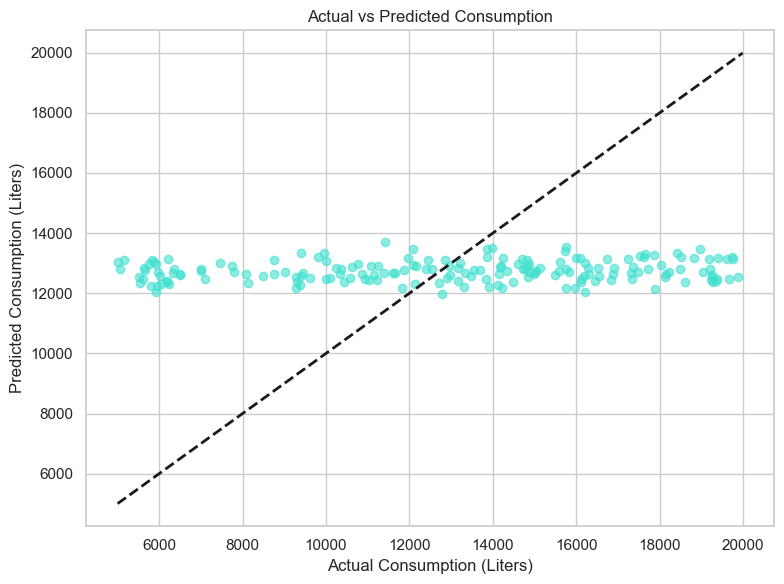

In [7]:
df_model = df.copy()

# Create a new feature from the date column (ordinal value)
df_model['date_ordinal'] = df_model['date'].map(pd.Timestamp.toordinal)

# One-hot encode the 'region' column
df_model = pd.get_dummies(df_model, columns=['region'], drop_first=True)  # dropping first to avoid dummy variable trap

# Select features and target
X = df_model.drop(columns=['date', 'consumption_liters'])
y = df_model['consumption_liters']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Prediction Performance:')
print('R² Score:', r2)
print('Mean Squared Error:', mse)

# Optional: Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='turquoise')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Consumption (Liters)')
plt.ylabel('Predicted Consumption (Liters)')
plt.title('Actual vs Predicted Consumption')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
from datetime import datetime, timedelta
import random

# Assuming your model is already trained and stored in 'model'
# If not, you'll need to load or define your model here
# from joblib import load
# model = load('your_anomaly_detection_model.joblib')

# Function to generate dummy water consumption data
def generate_dummy_data(seed=None):
    if seed:
        np.random.seed(seed)
    
    # Current timestamp
    current_time = datetime.now()
    
    # Create a dummy data point with features similar to your training data
    # Adjust these features based on your actual model inputs
    data = {
        'timestamp': current_time,
        'consumption': np.random.normal(100, 15),  # Normal consumption around 100 units
        'temperature': np.random.normal(22, 5),    # Temperature in Celsius
        'day_of_week': current_time.weekday(),
        'hour_of_day': current_time.hour
    }
    
    # Occasionally introduce anomalies (about 5% of the time)
    if np.random.random() < 0.05:
        # Anomaly: Unusually high or low consumption
        anomaly_factor = random.choice([0.2, 5.0])  # Either very low or very high
        data['consumption'] *= anomaly_factor
        is_anomaly = True
    else:
        is_anomaly = False
        
    return pd.DataFrame([data]), is_anomaly

# Function to make prediction using your model
def predict_anomaly(data):
    # Preprocess the data if needed
    # data_processed = preprocess(data)
    
    # For demonstration, we'll use a simple threshold-based detection
    # Replace this with your actual model prediction
    # prediction = model.predict(data_processed)
    
    # Dummy prediction logic (replace with your actual model)
    consumption = data['consumption'].values[0]
    prediction = 1 if consumption < 30 or consumption > 200 else 0
    
    return prediction

# Main loop for continuous monitoring
def continuous_monitoring(refresh_interval=5, seed=2):
    print("Starting continuous water consumption monitoring...")
    print(f"Using seed value: {seed}")
    print("Press Ctrl+C to stop the monitoring")
    
    try:
        while True:
            # Generate new data point
            new_data, actual_anomaly = generate_dummy_data(seed)
            
            # Make prediction
            prediction = predict_anomaly(new_data)
            
            # Display results
            print("\n" + "="*50)
            print(f"Timestamp: {new_data['timestamp'].values[0]}")
            print(f"Water Consumption: {new_data['consumption'].values[0]:.2f} units")
            print(f"Prediction: {'ANOMALY DETECTED!' if prediction == 1 else 'Normal consumption'}")
            
            # For demonstration, show if prediction matches actual anomaly status
            if actual_anomaly and prediction == 1:
                print("✓ True Positive: Correctly identified anomaly")
            elif not actual_anomaly and prediction == 0:
                print("✓ True Negative: Correctly identified normal consumption")
            elif actual_anomaly and prediction == 0:
                print("✗ False Negative: Missed anomaly")
            else:
                print("✗ False Positive: False alarm")
            
            # Wait for the next refresh
            time.sleep(refresh_interval)
            
    except KeyboardInterrupt:
        print("\nMonitoring stopped by user")

# Start the continuous monitoring with the specified seed
continuous_monitoring(refresh_interval=3, seed=4)  # Change to seed=2 if preferred

Starting continuous water consumption monitoring...
Using seed value: 4
Press Ctrl+C to stop the monitoring

Timestamp: 2025-08-31T21:54:45.526355000
Water Consumption: 100.76 units
Prediction: Normal consumption
✓ True Negative: Correctly identified normal consumption

Timestamp: 2025-08-31T21:54:48.532487000
Water Consumption: 100.76 units
Prediction: Normal consumption
✓ True Negative: Correctly identified normal consumption

Timestamp: 2025-08-31T21:54:51.536651000
Water Consumption: 100.76 units
Prediction: Normal consumption
✓ True Negative: Correctly identified normal consumption

Timestamp: 2025-08-31T21:54:54.540451000
Water Consumption: 100.76 units
Prediction: Normal consumption
✓ True Negative: Correctly identified normal consumption

Timestamp: 2025-08-31T21:54:57.548184000
Water Consumption: 100.76 units
Prediction: Normal consumption
✓ True Negative: Correctly identified normal consumption

Timestamp: 2025-08-31T21:55:00.554542000
Water Consumption: 100.76 units
Predicti